# Mini Project 5 - Classification with Neural Network

## 1. Load the data

In [1]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# load the data and print the shape
digits = load_digits()
print(digits.data.shape)
print(digits.target.shape)

(1797, 64)
(1797,)


## 2. Visualize the data

<Figure size 432x288 with 0 Axes>

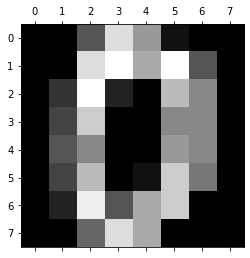

In [3]:
plt.gray()
# Visualize the first image
plt.matshow(digits.images[0])

## 3. Obtain the training set and the test set, and execute scaling

In [4]:
# 1. Load the data and the target values
X = np.array(digits.data)
Y = np.array(digits.target)

# 2. Scale the dataset features of X
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 3. Split the data into the training set and the test set (ratio being 80:20)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/5, random_state=42)

In [5]:
# 4. Obtain the transpose
X_train = X_train.T
X_test = X_test.T

In [6]:
# 5. Execute the one-hot encoding for both targets
one_hot_train = np.zeros((len(Y_train),10))
one_hot_train[np.arange(len(Y_train)),Y_train] = 1
Y_train = one_hot_train.T

one_hot_test = np.zeros((len(Y_test),10))
one_hot_test[np.arange(len(Y_test)),Y_test] = 1
Y_test = one_hot_test.T

In [7]:
# print the shapes to check if the conversions were done properly. 
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(64, 1437)
(64, 360)
(10, 1437)
(10, 360)


## 4. Define necessary functions

In [8]:
# 1. function to initialize weights and biases
# a,b,c will be the numbers of the neurons in different layers. In this case, a = 64, b = 20, c = 10
def initial_params(a,b,c):
    W1 = np.random.randn(b, a)
    b1 = np.random.randn(b, 1)
    W2 = np.random.randn(c, b)
    b2 = np.random.randn(c, 1)
    
    return W1, b1, W2, b2

# 2-1. Sigmoid function
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

# 2-2. Derivative of the sigmoid function
def d_sigmoid(Z):
    return sigmoid(Z)*(1-sigmoid(Z))

# 3-1. ReLU function
def ReLU(Z):
    return np.maximum(0,Z)

# 3-2. Derivative of the the ReLU function
def d_ReLU(Z):
    dZ = np.zeros_like(Z)
    dZ[Z>0] = 1
    return dZ

# 4-1. tanh function
def tanh(Z):
    return np.tanh(Z)

# 4-2. Derivative of the tanh function
def d_tanh(Z):
    return 1-(np.square(tanh(Z)))

# 5-1. feed forward function for sigmoid function
def forward_sigmoid(W1, b1, W2, b2, X):  
    Z1 = W1.dot(X) + b1
    A1 = sigmoid(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = sigmoid(Z2)
    return Z1, A1, Z2, A2

# 5-2. feed forward function for ReLU function
def forward_ReLU(W1, b1, W2, b2, X):     
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = ReLU(Z2)
    return Z1, A1, Z2, A2

# 5-3. feed forward function for tanh function
def forward_tanh(W1, b1, W2, b2, X): 
    Z1 = W1.dot(X) + b1
    A1 = tanh(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = tanh(Z2)
    return Z1, A1, Z2, A2

# 6-1 backpropagation for sigmoid function
def backprop_sigmoid(X, Y, W1, W2, A2, Z2, A1, Z1):
    
    # dC/dZ2 = dC/dA2 * dA2/dZ2 (10*m)
    dZ2 = (A2 - Y) * d_sigmoid(Z2)
    # dC/dW2 = dC/dZ2 * dZ2/dW2 (10*30)
    dW2 = dZ2.dot(A1.T)
    # dC/db2 = dC/dZ2 * dZ2/db2 = dC/dZ2 * 1 (10*1)
    db2 = np.sum(dZ2, axis=1, keepdims=True)
    # dC/dZ1 = dC/dZ2 * dZ2/dA1 * dA1/dZ1 = "dZ2" * W2 * d_sigmoid (30*m)
    dZ1 = np.dot(W2.T, dZ2) * d_sigmoid(Z1)
    # dC/dW1 = dC/dZ1 * dZ1/dW1 = "dZ1" * X.T (30*64)
    dW1 = np.dot(dZ1, X.T)
    # dC/db1 = dC/dZ1 * dZ1/db1 = "dZ1" * 1 (30*1)
    db1 = np.sum(dZ1, axis=1, keepdims=True)
    
    return dW1, db1, dW2, db2

# 6-2 backpropagation for ReLU function
def backprop_ReLU(X, Y, W1, W2, A2, Z2, A1, Z1):
    
    # dC/dZ2 = dC/dA2 * dA2/dZ2 (10*m)
    dZ2 = (A2 - Y) * d_ReLU(Z2)
    # dC/dW2 = dC/dZ2 * dZ2/dW2 (10*30)
    dW2 = dZ2.dot(A1.T)
    # dC/db2 = dC/dZ2 * dZ2/db2 = dC/dZ2 * 1 (10*1)
    db2 = np.sum(dZ2, axis=1, keepdims=True)
    # dC/dZ1 = dC/dZ2 * dZ2/dA1 * dA1/dZ1 = "dZ2" * W2 * d_sigmoid (30*m)
    dZ1 = np.dot(W2.T, dZ2) * d_ReLU(Z1)
    # dC/dW1 = dC/dZ1 * dZ1/dW1 = "dZ1" * X.T (30*64)
    dW1 = np.dot(dZ1, X.T)
    # dC/db1 = dC/dZ1 * dZ1/db1 = "dZ1" * 1 (30*1)
    db1 = np.sum(dZ1, axis=1, keepdims=True)
    
    return dW1, db1, dW2, db2

# 6-2 backpropagation for tanh(x) function
def backprop_tanh(X, Y, W1, W2, A2, Z2, A1, Z1):
    
    # dC/dZ2 = dC/dA2 * dA2/dZ2 (10*m)
    dZ2 = (A2 - Y) * d_tanh(Z2)
    # dC/dW2 = dC/dZ2 * dZ2/dW2 (10*30)
    dW2 = dZ2.dot(A1.T)
    # dC/db2 = dC/dZ2 * dZ2/db2 = dC/dZ2 * 1 (10*1)
    db2 = np.sum(dZ2, axis=1, keepdims=True)
    # dC/dZ1 = dC/dZ2 * dZ2/dA1 * dA1/dZ1 = "dZ2" * W2 * d_sigmoid (30*m)
    dZ1 = np.dot(W2.T, dZ2) * d_tanh(Z1)
    # dC/dW1 = dC/dZ1 * dZ1/dW1 = "dZ1" * X.T (30*64)
    dW1 = np.dot(dZ1, X.T)
    # dC/db1 = dC/dZ1 * dZ1/db1 = "dZ1" * 1 (30*1)
    db1 = np.sum(dZ1, axis=1, keepdims=True)
    
    return dW1, db1, dW2, db2

# 7. function to update the params
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1    
    W2 = W2 - learning_rate * dW2  
    b2 = b2 - learning_rate * db2    
    return W1, b1, W2, b2

# 8. function to compute the accuracy
def accuracy(A2,Y):
    return np.sum(np.argmax(A2, axis=0) == np.argmax(Y, axis=0))/len(Y[0])

# 9-1. Model training with sigmoid function
def NN_training_sigmoid(X, Y, learning_rate, iterations):
    
    # initialize the weights and biases for 2 layers
    W1, b1, W2, b2 = initial_params(64,30,10)
    
    # Repeat the gradient descent for the number of iterations:
    for i in range(1,iterations+1):
        # forward feeding
        Z1, A1, Z2, A2 = forward_sigmoid(W1, b1, W2, b2, X)
        # backpropagation
        dW1, db1, dW2, db2 = backprop_sigmoid(X, Y, W1, W2, A2, Z2, A1, Z1)
        # update parameters
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
        if (i%100 == 0):
            print("iteration", i,": accuracy:", accuracy(A2,Y))    
    return W1, b1, W2, b2

# 9-2. Model training with ReLU function
def NN_training_ReLU(X, Y, learning_rate, iterations):
    
    # initialize the weights and biases for 2 layers
    W1, b1, W2, b2 = initial_params(64,30,10)
    
    # Repeat the gradient descent for the number of iterations:
    for i in range(1,iterations+1):
        # forward feeding
        Z1, A1, Z2, A2 = forward_ReLU(W1, b1, W2, b2, X)
        # backpropagation
        dW1, db1, dW2, db2 = backprop_ReLU(X, Y, W1, W2, A2, Z2, A1, Z1)
        # update parameters
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
        if (i%100 == 0):
            print("iteration", i,": accuracy:", accuracy(A2,Y))     
    return W1, b1, W2, b2

# 9-3. Model training with tanh function
def NN_training_tanh(X, Y, learning_rate, iterations):
    
    # initialize the weights and biases for 2 layers
    W1, b1, W2, b2 = initial_params(64,30,10)
    
    # Repeat the gradient descent for the number of iterations:
    for i in range(1,iterations+1):
        # forward feeding
        Z1, A1, Z2, A2 = forward_tanh(W1, b1, W2, b2, X)
        # backpropagation
        dW1, db1, dW2, db2 = backprop_tanh(X, Y, W1, W2, A2, Z2, A1, Z1)
        # update parameters
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
        if (i%100 == 0):
            print("iteration", i,": accuracy:", accuracy(A2,Y))    
    return W1, b1, W2, b2

## 5. Train and test the neural networks with different activation functions

### 1. Sigmoid function

In [9]:
# 1. Train the model with the training set (learning rate = 0.001, iterations = 1000)
W1, b1, W2, b2 = NN_training_sigmoid(X_train,Y_train, 0.001, 1000)

iteration 100 : accuracy: 0.34725121781489215
iteration 200 : accuracy: 0.430062630480167
iteration 300 : accuracy: 0.5031315240083507
iteration 400 : accuracy: 0.5741127348643006
iteration 500 : accuracy: 0.6082115518441197
iteration 600 : accuracy: 0.6249130132219902
iteration 700 : accuracy: 0.6443980514961726
iteration 800 : accuracy: 0.6506610995128741
iteration 900 : accuracy: 0.6527487821851079
iteration 1000 : accuracy: 0.6569241475295755


In [10]:
# 2. Test the model with the test set
Z1, A1, Z2, A2 = forward_sigmoid(W1, b1, W2, b2, X_test)
print("accuracy: ", accuracy(A2,Y_test))

accuracy:  0.6361111111111111


As shown above, the neural network with sigmoid function as activation function shows a high accuracy for both training set and test set. 

### 2. ReLU function

In [11]:
# 1. Train the model with the training set (learning rate = 0.00001, iterations = 1000)
# Note that the learning rate was set very low, as the error will be very high. Further explanations shown below.
W1, b1, W2, b2 = NN_training_ReLU(X_train,Y_train, 0.00000001, 1000)

iteration 100 : accuracy: 0.03479471120389701
iteration 200 : accuracy: 0.04175365344467641
iteration 300 : accuracy: 0.04384133611691023
iteration 400 : accuracy: 0.04384133611691023
iteration 500 : accuracy: 0.04523312456506611
iteration 600 : accuracy: 0.04314544189283229
iteration 700 : accuracy: 0.03897007654836465
iteration 800 : accuracy: 0.03688239387613083
iteration 900 : accuracy: 0.03479471120389701
iteration 1000 : accuracy: 0.03479471120389701


In [12]:
# 2. Test the model with the test set
Z1, A1, Z2, A2 = forward_ReLU(W1, b1, W2, b2, X_test)
print("accuracy: ", accuracy(A2,Y_test))

accuracy:  0.025


As shown above, the neural network with ReLU function as activation function shows a low accuracy for both training set and test sets.

More importantly, the accuracy remains the same during the learning, which indicates that the model barely learns or updates the weights or biases but remains the initial value.

This is because this neural network **is using the ReLU function as the activation function of the output layer.** 

The range of ReLU function is [0,+inf], while the target y value is either 0 to 1. 

Note that we are using the MSE to compute the error but obtaining the maximum activation number as the final prediction. This is self-contradictory, which leads to the situation that the program never effectively updates the params in the learning process

### 3. tanh function

In [13]:
# 1. Train the model with the training set (learning rate = 0.001, iterations = 1000)
W1, b1, W2, b2 = NN_training_tanh(X_train,Y_train, 0.001, 1000)

iteration 100 : accuracy: 0.38552540013917885
iteration 200 : accuracy: 0.5539318023660403
iteration 300 : accuracy: 0.6938065414057063
iteration 400 : accuracy: 0.7689631176061239
iteration 500 : accuracy: 0.8121085594989561
iteration 600 : accuracy: 0.8434237995824635
iteration 700 : accuracy: 0.8636047320807237
iteration 800 : accuracy: 0.8768267223382046
iteration 900 : accuracy: 0.8956158663883089
iteration 1000 : accuracy: 0.9088378566457899


In [14]:
Z1, A1, Z2, A2 = forward_tanh(W1, b1, W2, b2, X_test)
print("accuracy: ", accuracy(A2,Y_test))

accuracy:  0.8805555555555555


As shown above, similar to the one with sigmoid function, the neural network using the tanh function as the showed hige accuracy for both training set and the test set as well.

### 4. Hyperparameters tuning

Before get started, ignore the NN using the ReLU function as it shows poor performance

**First**, As I found the accuracy varies significantly when the iteration number is 1000. So, I decide to increase it to 5000 for both sigmoid NN and tanh network

In [15]:
# 1. Train the model with the training set (learning rate = 0.001, iterations = 5000)
W1, b1, W2, b2 = NN_training_sigmoid(X_train,Y_train, 0.001, 5000)
# 2. Test the model with the test set
Z1, A1, Z2, A2 = forward_sigmoid(W1, b1, W2, b2, X_test)
print("accuracy: ", accuracy(A2,Y_test))

iteration 100 : accuracy: 0.615866388308977
iteration 200 : accuracy: 0.7341684064022269
iteration 300 : accuracy: 0.7919276270006959
iteration 400 : accuracy: 0.8761308281141267
iteration 500 : accuracy: 0.9123173277661796
iteration 600 : accuracy: 0.9283228949199722
iteration 700 : accuracy: 0.9401530967292971
iteration 800 : accuracy: 0.9457202505219207
iteration 900 : accuracy: 0.9491997216423104
iteration 1000 : accuracy: 0.953375086986778
iteration 1100 : accuracy: 0.9596381350034795
iteration 1200 : accuracy: 0.9659011830201809
iteration 1300 : accuracy: 0.9665970772442589
iteration 1400 : accuracy: 0.9700765483646486
iteration 1500 : accuracy: 0.9721642310368824
iteration 1600 : accuracy: 0.9742519137091162
iteration 1700 : accuracy: 0.9756437021572721
iteration 1800 : accuracy: 0.9756437021572721
iteration 1900 : accuracy: 0.97633959638135
iteration 2000 : accuracy: 0.9798190675017397
iteration 2100 : accuracy: 0.9812108559498957
iteration 2200 : accuracy: 0.9812108559498957
i

In [16]:
# 1. Train the model with the training set (learning rate = 0.001, iterations = 5000)
W1, b1, W2, b2 = NN_training_tanh(X_train,Y_train, 0.001, 5000)
# 2. Test the model with the test set
Z1, A1, Z2, A2 = forward_tanh(W1, b1, W2, b2, X_test)
print("accuracy: ", accuracy(A2,Y_test))

iteration 100 : accuracy: 0.3117606123869172
iteration 200 : accuracy: 0.510786360473208
iteration 300 : accuracy: 0.662491301322199
iteration 400 : accuracy: 0.7807933194154488
iteration 500 : accuracy: 0.8427279053583855
iteration 600 : accuracy: 0.8434237995824635
iteration 700 : accuracy: 0.872651356993737
iteration 800 : accuracy: 0.8907446068197634
iteration 900 : accuracy: 0.8970076548364648
iteration 1000 : accuracy: 0.9109255393180237
iteration 1100 : accuracy: 0.9137091162143354
iteration 1200 : accuracy: 0.9171885873347251
iteration 1300 : accuracy: 0.9220598469032707
iteration 1400 : accuracy: 0.9234516353514266
iteration 1500 : accuracy: 0.930410577592206
iteration 1600 : accuracy: 0.9359777313848295
iteration 1700 : accuracy: 0.942936673625609
iteration 1800 : accuracy: 0.942936673625609
iteration 1900 : accuracy: 0.9485038274182325
iteration 2000 : accuracy: 0.9485038274182325
iteration 2100 : accuracy: 0.9498956158663883
iteration 2200 : accuracy: 0.9505915100904663
ite

Although the accuracy results may vary for different trials, we can see that, in general, 5000 times of iteration is sufficient to stably obtain the high performance for both sigmoid NN and tanh NN. 

**Second**, I supposed the learning rate of 0.001 was so low that the number of iterations was not enough to stably produce effective NNs. Therefore, I raised it up to 0.01, while the iterations remaining 1000.

In [17]:
# 1. Train the model with the training set (learning rate = 0.1, iterations = 1000)
W1, b1, W2, b2 = NN_training_sigmoid(X_train,Y_train, 0.01, 1000)
# 2. Test the model with the test set
Z1, A1, Z2, A2 = forward_sigmoid(W1, b1, W2, b2, X_test)
print("accuracy: ", accuracy(A2,Y_test))

iteration 100 : accuracy: 0.9380654140570633
iteration 200 : accuracy: 0.9714683368128044
iteration 300 : accuracy: 0.9819067501739736
iteration 400 : accuracy: 0.9895615866388309
iteration 500 : accuracy: 0.9895615866388309
iteration 600 : accuracy: 0.9916492693110647
iteration 700 : accuracy: 0.9923451635351427
iteration 800 : accuracy: 0.9937369519832986
iteration 900 : accuracy: 0.9937369519832986
iteration 1000 : accuracy: 0.9944328462073765
accuracy:  0.9527777777777777


In [19]:
# 1. Train the model with the training set (learning rate = 0.1, iterations = 1000)
W1, b1, W2, b2 = NN_training_sigmoid(X_train,Y_train, 0.01, 1000)
# 2. Test the model with the test set
Z1, A1, Z2, A2 = forward_sigmoid(W1, b1, W2, b2, X_test)
print("accuracy: ", accuracy(A2,Y_test))

iteration 100 : accuracy: 0.6805845511482255
iteration 200 : accuracy: 0.8761308281141267
iteration 300 : accuracy: 0.9839944328462074
iteration 400 : accuracy: 0.9874739039665971
iteration 500 : accuracy: 0.988169798190675
iteration 600 : accuracy: 0.988865692414753
iteration 700 : accuracy: 0.9895615866388309
iteration 800 : accuracy: 0.9895615866388309
iteration 900 : accuracy: 0.9895615866388309
iteration 1000 : accuracy: 0.9902574808629089
accuracy:  0.9722222222222222


As shown above, the accuracy improves much faster when the learning rate is increased to 0.01. 

**If I should choose only one between increasing the iterations to 5000 and increasing the rate to 0.01, I would choose the latter since this is more computationally efficient.** 